# Library

In [29]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import numpy as np
import scipy
import plotly 
from collections import Counter
plotly.tools.set_credentials_file(username='Chanator', api_key='x9OeUgtjboRm2o5ckCNJ')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

# Dataset Train

In [22]:
df_train = pd.read_csv(os.path.join( 'Dataset', 'train.csv'))

df_train

,age,class_of_worker,industry_code,occupation_code,education,...,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,...,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,...,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,...,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,...,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,...,Not in universe,0,0,94,-50000
5,48,Private,40,10,Some college but no degree,...,Not in universe,2,52,95,-50000
6,42,Private,34,3,Bachelors degree(BA AB BS),...,Not in universe,2,52,94,-50000
7,28,Private,4,40,High school graduate,...,Not in universe,2,30,95,-50000
8,47,Local government,43,26,Some college but no degree,...,Not in universe,2,52,95,-50000
9,34,Private,4,37,Some college but no degree,...,Not in universe,2,52,94,-50000


## Summary Table

In [11]:
rows = list(df_train.columns.values)

Type = []
missing_values = []
i = 0
for col in df_train:
    a = df_train[col].unique()
    if len(a) <= 5:
        Type.append("Categorical")
        str1 = ''.join(str(e) for e in a)
    else:
        Type.append("Continuous")
    if df_train[col].isnull().sum() == 1:
        missing_values.append("There is " + `df_train[col].isnull().sum()` + " missing value")
    else:
        missing_values.append("There are " + `df_train[col].isnull().sum()` + " missing values")
        
columns = ['Variables','Type of Variables','Missing Values']
data_dictionary = pd.DataFrame({'Missing Values' : missing_values, 'Type of Variables' : Type, 'Variables' : rows,
                               })
data_dictionary[columns]

,Variables,Type of Variables,Missing Values
0,age,Continuous,There are 0 missing values
1,class_of_worker,Continuous,There are 0 missing values
2,industry_code,Continuous,There are 0 missing values
3,occupation_code,Continuous,There are 0 missing values
4,education,Continuous,There are 0 missing values
5,wage_per_hour,Continuous,There are 0 missing values
6,enrolled_in_edu_inst_lastwk,Categorical,There are 0 missing values
7,marital_status,Continuous,There are 0 missing values
8,major_industry_code,Continuous,There are 0 missing values
9,major_occupation_code,Continuous,There are 0 missing values


In [23]:
df_train.income_level.unique()

array([-50000,  50000], dtype=int64)

In [24]:
#Here I change the income level to -50000 = 0 and 50000 = 1
df_train["income_level"] = df_train.income_level.map({-50000: 0 , 50000: 1})

In [33]:
#Creating a table to understan the probability to belong of a certain income level group
pd.crosstab(index = df_train["income_level"], columns="Frequency")/df_train["income_level"].count()

col_0,Frequency
income_level,
0,0.937942
1,0.062058


# Descriptive Analysis

In [34]:
color = df_train.income_level.map({0: 'red', 1: 'green'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014065278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001256E128>]], dtype=object)

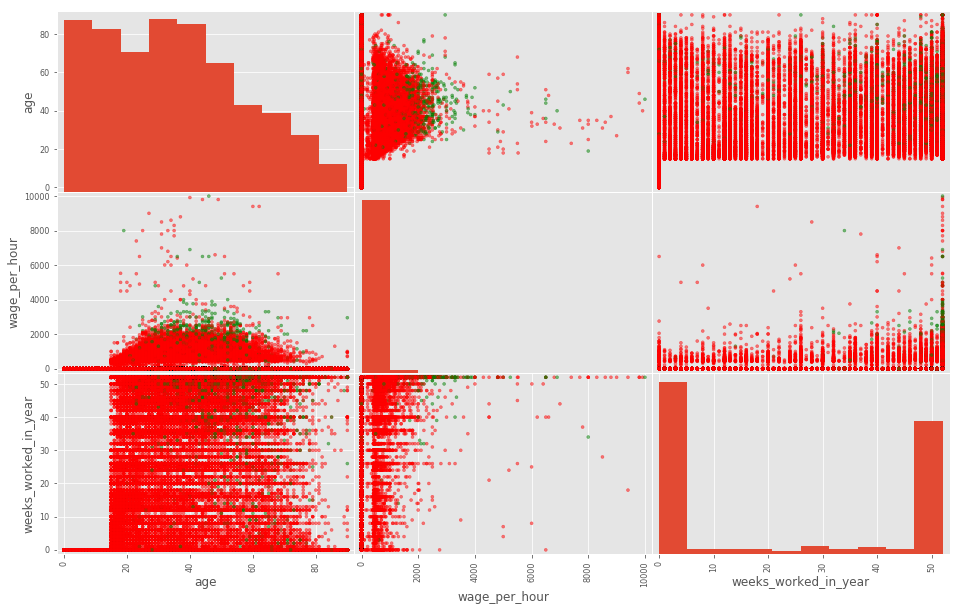

In [38]:
pd.tools.plotting.scatter_matrix(df_train[['age','wage_per_hour','weeks_worked_in_year']], c = color ,figsize = (16, 10))

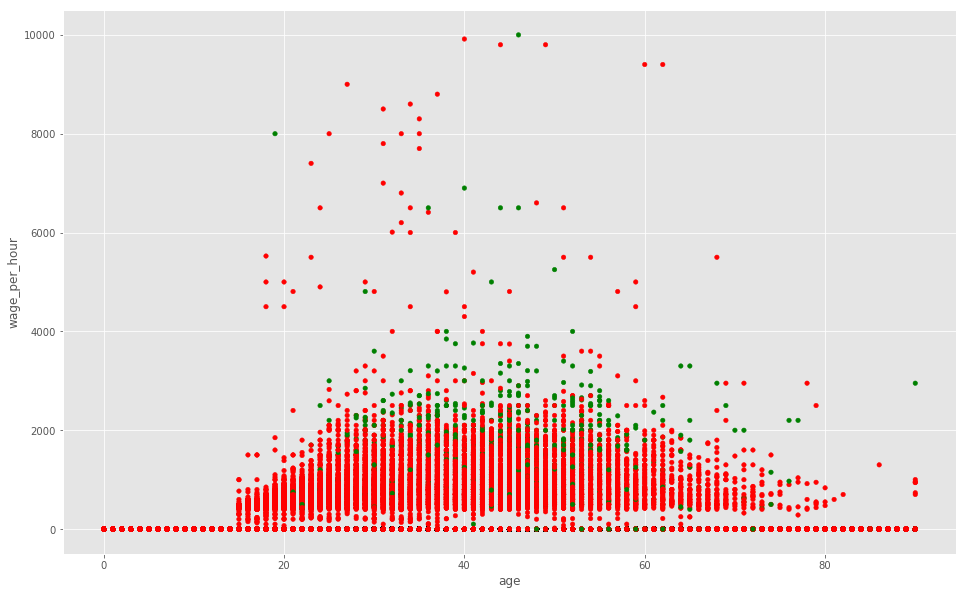

In [40]:
df_train.plot(kind = 'scatter', x = 'age', y = 'wage_per_hour', c = color, figsize = (16, 10))